<a href="https://colab.research.google.com/github/IzaakGagnon/SSC_GliderProject/blob/main/Test_code/More_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###############################################################


#################
# LINEAR MODELS #
#################


# Installs (only needed on first run)

!pip install ripser
!pip install persim
!pip install networkx
!pip install scikit-learn
!pip install matplotlib
!pip install tables


# Package imports (needed every run)
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial.distance import pdist, squareform
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import os # Required to use file paths
import shutil # Required to move temporary files around
import random # Used to create training/testing split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import KFold


# As needed
from google.colab import drive
drive.mount('/content/drive')


# Tell python which folder to look in. Change depending on the bin dimension
dim_bins = 10
folder_path = f"/content/drive/MyDrive/dim_bins{dim_bins}/"
relative_path = f"/dim_bins{dim_bins}/"

# Function to the h5 file at the chosen path
def read_h5(file_path):
    if file_name.endswith(".h5"):
      df = pd.read_hdf(file_path)
      print("File successfully read.\n")
      return df
    else:
      print("File is not an h5. Skipping...\n")

folder_path = f"/content/drive/MyDrive/dim_bins{dim_bins}/"
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

datasets = [pd.read_hdf(os.path.join(folder_path, f), key="data") for f in file_names]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Assume datasets is a list of preloaded DataFrames
n_datasets = len(datasets)
k = 10  # Number of folds

kf = KFold(n_splits=k, shuffle=True, random_state=42)
dataset_indices = np.arange(n_datasets)

folds = []

for train_indices, test_indices in kf.split(dataset_indices):
    train_df = pd.concat([datasets[i] for i in train_indices], ignore_index=True)
    test_df = pd.concat([datasets[i] for i in test_indices], ignore_index=True)
    folds.append((train_df, test_df))

print(f"Created {len(folds)} dataset-level k-fold splits.")
print(folds)

Created 10 dataset-level k-fold splits.
[(          voxel      oxygen  longitude   latitude       depth   salinity  \
0     (0, 6, 0)  231.220352 -64.063545  47.600685    1.151267  28.210661   
1     (0, 6, 1)  229.479721 -64.038872  47.611111    2.332440  28.192797   
2     (0, 7, 0)  231.331421 -64.057968  47.628212    1.334222  28.231403   
3     (0, 7, 1)  230.757416 -64.057327  47.629524    2.320893  28.200562   
4     (0, 7, 4)  244.857422 -63.989834  47.644463    9.135390  28.271452   
...         ...         ...        ...        ...         ...        ...   
7308  (9, 9, 5)  112.309006 -59.646187  47.736191  292.948578  34.962215   
7309  (9, 9, 6)  113.267097 -59.646133  47.736210  304.197571  34.973133   
7310  (9, 9, 7)  114.320801 -59.646198  47.736195  315.443695  34.980167   
7311  (9, 9, 8)  115.681328 -59.646168  47.736168  326.696136  34.984879   
7312  (9, 9, 9)  116.403496 -59.646214  47.736126  335.007507  34.989201   

          density  temperature  
0     1020.3

Linear Regression Results:
Mean Squared Error: 563.2462
R² Score: 0.8799 
 

Ridge Regression Results:
Mean Squared Error: 563.1932
R² Score: 0.8799
Optimal ridge penalty: 284.8035868435805
Ridge Regression with Best Alpha (284.8035868435805):
Mean Squared Error: 558.6813
R² Score: 0.8809


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.919e+05, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.919e+05, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(


Best Elastic penalty: 0.001, Best L1 Ratio: 1
Elastic Net with Interaction Terms:
Mean Squared Error: 349.6733
R² Score: 0.9254


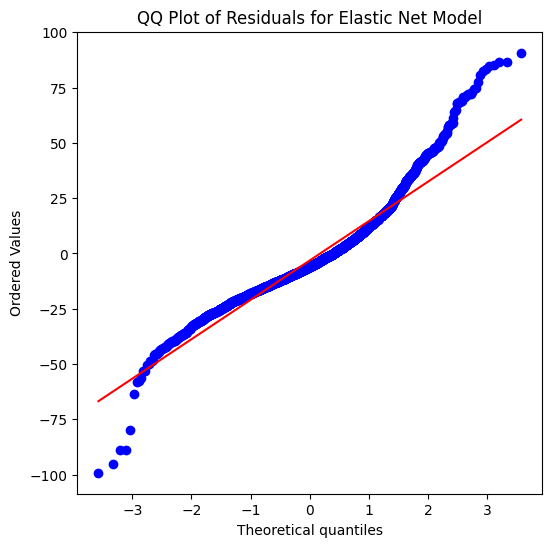

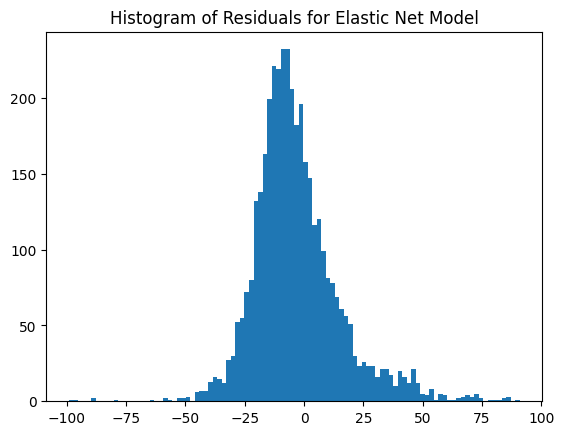

In [11]:
#################
# Linear Models #
#################

from sklearn.model_selection import GridSearchCV

#######################################
# Model 1) Linear regression          #
#######################################

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Linear Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f} \n \n")

#############################
# Model 2) Ridge regression #
#############################

# 2a) Ridge Regression (fixed penalty)

ridge_penalty = 0.5

# Python uses alpha instead of lambda for the ridge penalty
ridge_model = Ridge(alpha = ridge_penalty)
ridge_model.fit(X_train, y_train)

# Predictions on test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Ridge Regression Results:")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")

# 2b) Ridge Regression with Cross Validation for optimal penalty term

# Define the Ridge regression model
ridge = Ridge()

# Define the grid of alpha values
alpha_grid = {'alpha': np.logspace(-3, 3, 100)}


# Perform Grid Search with Cross-Validation
ridge_cv = GridSearchCV(ridge, alpha_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = ridge_cv.best_params_['alpha']
print(f"Optimal ridge penalty: {best_alpha}")

# Train Ridge Regression with the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Predictions on test set
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Ridge Regression with Best Alpha ({best_alpha}):")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")



########################
# 3) Elastic net model #
########################


# Expand feature space with interaction terms (without high-degree polynomials)
poly = PolynomialFeatures(degree=5, interaction_only=True, include_bias=False)
X_train_expanded = poly.fit_transform(X_train)
X_test_expanded = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_expanded)
X_test_scaled = scaler.transform(X_test_expanded)

# Define Elastic Net model
elastic_net = ElasticNet(max_iter=500)  # High max_iter for convergence

# Define Grid Search for alpha (regularization strength) and l1_ratio (balance between Lasso & Ridge)
param_grid = {
    'alpha': np.logspace(-3, 3, 100),  # Regularization strength
    'l1_ratio': [0,0.5,1]   # 0 = Ridge, 1 = Lasso, values in between = Elastic Net
}

# Perform Grid Search with Cross-Validation (5-fold CV)
elastic_cv = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
elastic_cv.fit(X_train_scaled, y_train)

# Get the best alpha and l1_ratio
best_alpha = elastic_cv.best_params_['alpha']
best_l1_ratio = elastic_cv.best_params_['l1_ratio']
print(f"Best Elastic penalty: {best_alpha}, Best L1 Ratio: {best_l1_ratio}")

# Train final Elastic Net model with best parameters
best_elastic = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=500)
best_elastic.fit(X_train_scaled, y_train)

# Predictions on test set
y_pred_elastic = best_elastic.predict(X_test_scaled)

# Evaluate the Elastic Net model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Print results
print(f"Elastic Net with Interaction Terms:")
print(f"Mean Squared Error: {mse_elastic:.4f}")
print(f"R² Score: {r2_elastic:.4f}")

# Residuals: difference between true values and predicted values
residuals = y_test - y_pred_elastic

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals for Elastic Net Model')
plt.show()

plt.hist(residuals, 100)
plt.title('Histogram of Residuals for Elastic Net Model')
plt.show()

In [10]:
#######################
# 4) Lasso Regression #
#######################

from sklearn.linear_model import Lasso

# Standardize features (you already have this from Elastic Net)
# X_train_scaled, X_test_scaled are already defined

# 4a) Lasso Regression with fixed alpha
lasso_penalty = 0.1
lasso_model = Lasso(alpha=lasso_penalty, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression (alpha={lasso_penalty}):")
print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")

# 4b) Lasso with cross-validation to tune alpha
lasso = Lasso(max_iter=10000)
param_grid = {'alpha': np.logspace(-3, 3, 100)}

lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f"Optimal Lasso penalty: {best_alpha_lasso}")

# Final model with best alpha
best_lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000)
best_lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lasso = best_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression with Best Alpha ({best_alpha_lasso}):")
print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")


Lasso Regression (alpha=0.1):
Mean Squared Error: 556.0739
R² Score: 0.8814


KeyboardInterrupt: 

A Custom CV Fold Generator

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from itertools import combinations

# Assume datasets is a list of preloaded DataFrames
n_datasets = len(datasets)
k = 10 # Total number of folds
train_folds_count = 5

# Step 1: Assign datasets to k folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
dataset_indices = np.arange(n_datasets)

# Organize dataset indices into k folds
folds = [[] for _ in range(k)]
for fold_idx, (_, test_idx) in enumerate(kf.split(dataset_indices)):
    for i in test_idx:
        folds[fold_idx].append(i)

# Step 2: Generate all combinations of 4 folds for training
train_fold_combos = list(combinations(range(k), train_folds_count))
custom_folds = []

# Step 3: Build train/test sets for each combination
for train_combo in train_fold_combos:
    test_combo = [i for i in range(k) if i not in train_combo]

    train_indices = [idx for fold in train_combo for idx in folds[fold]]
    test_indices = [idx for fold in test_combo for idx in folds[fold]]

    train_df = pd.concat([datasets[i] for i in train_indices], ignore_index=True)
    test_df = pd.concat([datasets[i] for i in test_indices], ignore_index=True)

    custom_folds.append((train_df, test_df))

print(f"Created {len(custom_folds)} custom CV splits ({train_folds_count} train folds, {k - train_folds_count} test folds).")


Created 252 custom CV splits (5 train folds, 5 test folds).


In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
target = 'oxygen'
features = ['']
# Storage for results
mse_scores = []
r2_scores = []

for i, (train_df, test_df) in enumerate(custom_folds):
    # Split into features and target
    X_train = train_df.drop(columns=[target,"voxel"])  # Replace 'target' with your actual target column
    y_train = train_df[target]
    X_test = test_df.drop(columns=[target,"voxel"])
    y_test = test_df[target]

    # Define and train XGBoost model
    model = xgb.XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {i+1:03d} | MSE: {mse:.4f} | R²: {r2:.4f}")

# Final summary
print("\n===== Cross-Validation Results =====")
print(f"Average MSE: {np.mean(mse_scores):.4f} ± {1.96*np.std(mse_scores):.4f}")
print(f"Average R²: {np.mean(r2_scores):.4f} ± {1.96*np.std(r2_scores):.4f}")


Fold 001 | MSE: 361.0656 | R²: 0.9480
Fold 002 | MSE: 279.4495 | R²: 0.9599
Fold 003 | MSE: 321.8240 | R²: 0.9472
Fold 004 | MSE: 331.7576 | R²: 0.9208
Fold 005 | MSE: 346.4813 | R²: 0.9534
Fold 006 | MSE: 415.6583 | R²: 0.9417
Fold 007 | MSE: 248.2637 | R²: 0.9611
Fold 008 | MSE: 308.8398 | R²: 0.9499
Fold 009 | MSE: 241.0207 | R²: 0.9490
Fold 010 | MSE: 257.1541 | R²: 0.9650
Fold 011 | MSE: 347.7672 | R²: 0.9472
Fold 012 | MSE: 272.4069 | R²: 0.9556
Fold 013 | MSE: 233.3287 | R²: 0.9493
Fold 014 | MSE: 248.0888 | R²: 0.9661
Fold 015 | MSE: 287.8270 | R²: 0.9576
Fold 016 | MSE: 313.0541 | R²: 0.8865
Fold 017 | MSE: 300.2730 | R²: 0.9532
Fold 018 | MSE: 275.3459 | R²: 0.9561
Fold 019 | MSE: 331.1456 | R²: 0.9269
Fold 020 | MSE: 309.8949 | R²: 0.9339
Fold 021 | MSE: 290.5096 | R²: 0.9612
Fold 022 | MSE: 231.2786 | R²: 0.9616
Fold 023 | MSE: 264.6117 | R²: 0.9531
Fold 024 | MSE: 311.1518 | R²: 0.9217
Fold 025 | MSE: 307.8298 | R²: 0.9555
Fold 026 | MSE: 423.7877 | R²: 0.9319
Fold 027 | M

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Replace with the actual column name of your target
target_col = 'oxygen'  # example

mse_rf_scores = []
r2_rf_scores = []

for i, (train_df, test_df) in enumerate(custom_folds):
    X_train = train_df.drop(columns=[target_col,'voxel'])
    y_train = train_df[target_col]
    X_test = test_df.drop(columns=[target_col,'voxel'])
    y_test = test_df[target_col]

    # Define and train Random Forest model
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_rf_scores.append(mse)
    r2_rf_scores.append(r2)

    print(f"[RF] Fold {i+1:03d} | MSE: {mse:.4f} | R²: {r2:.4f}")

# Final summary
print("\n===== Random Forest CV Results =====")
print(f"Average MSE: {np.mean(mse_rf_scores):.4f} ± {1.96*np.std(mse_rf_scores):.4f}")
print(f"Average R²: {np.mean(r2_rf_scores):.4f} ± {1.96*np.std(r2_rf_scores):.4f}")


[RF] Fold 001 | MSE: 375.1410 | R²: 0.9459
[RF] Fold 002 | MSE: 307.9654 | R²: 0.9558
[RF] Fold 003 | MSE: 277.9608 | R²: 0.9544
[RF] Fold 004 | MSE: 367.5588 | R²: 0.9122
[RF] Fold 005 | MSE: 375.2610 | R²: 0.9495
[RF] Fold 006 | MSE: 488.8538 | R²: 0.9314
[RF] Fold 007 | MSE: 350.5101 | R²: 0.9451
[RF] Fold 008 | MSE: 213.4672 | R²: 0.9654
[RF] Fold 009 | MSE: 283.6181 | R²: 0.9400
[RF] Fold 010 | MSE: 410.4817 | R²: 0.9441
[RF] Fold 011 | MSE: 569.7313 | R²: 0.9135
[RF] Fold 012 | MSE: 184.0667 | R²: 0.9700
[RF] Fold 013 | MSE: 197.9226 | R²: 0.9570
[RF] Fold 014 | MSE: 299.7422 | R²: 0.9591
[RF] Fold 015 | MSE: 303.9701 | R²: 0.9552
[RF] Fold 016 | MSE: 259.6594 | R²: 0.9058
[RF] Fold 017 | MSE: 238.7339 | R²: 0.9628
[RF] Fold 018 | MSE: 219.2480 | R²: 0.9650
[RF] Fold 019 | MSE: 327.9977 | R²: 0.9276
[RF] Fold 020 | MSE: 277.4157 | R²: 0.9408
[RF] Fold 021 | MSE: 346.6377 | R²: 0.9537
[RF] Fold 022 | MSE: 246.3248 | R²: 0.9591
[RF] Fold 023 | MSE: 233.7396 | R²: 0.9585
[RF] Fold 0

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Replace with your actual target column
target_col = 'oxygen'  # e.g. 'phi', 'temperature', etc.
numfolds = 20
mse_mlp_scores = []
r2_mlp_scores = []

for i, (train_df, test_df) in enumerate(custom_folds[:numfolds]):
    X_train = train_df.drop(columns=[target_col,'voxel'])
    y_train = train_df[target_col]
    X_test = test_df.drop(columns=[target_col,'voxel'])
    y_test = test_df[target_col]

    # Standardize features (important for neural networks)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define and train MLP model
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=42
    )
    mlp_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = mlp_model.predict(X_test_scaled)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_mlp_scores.append(mse)
    r2_mlp_scores.append(r2)

    print(f"[MLP] Fold {i+1:03d} | MSE: {mse:.4f} | R²: {r2:.4f}")

# Final summary
print("\n===== MLP Regressor CV Results =====")
print(f"Average MSE: {np.mean(mse_mlp_scores):.4f} ± {np.std(mse_mlp_scores):.4f}")
print(f"Average R²: {np.mean(r2_mlp_scores):.4f} ± {np.std(r2_mlp_scores):.4f}")


[MLP] Fold 001 | MSE: 999.6486 | R²: 0.8559
[MLP] Fold 002 | MSE: 472.2788 | R²: 0.9322
[MLP] Fold 003 | MSE: 312.1993 | R²: 0.9488
[MLP] Fold 004 | MSE: 598.5487 | R²: 0.8571
[MLP] Fold 005 | MSE: 553.7377 | R²: 0.9255
[MLP] Fold 006 | MSE: 1876.0072 | R²: 0.7369
[MLP] Fold 007 | MSE: 318.5078 | R²: 0.9501
[MLP] Fold 008 | MSE: 297.5709 | R²: 0.9517
[MLP] Fold 009 | MSE: 597.6978 | R²: 0.8736
[MLP] Fold 010 | MSE: 515.0303 | R²: 0.9299
[MLP] Fold 011 | MSE: 1113.4718 | R²: 0.8310
[MLP] Fold 012 | MSE: 226.7173 | R²: 0.9630
[MLP] Fold 013 | MSE: 243.4921 | R²: 0.9471
[MLP] Fold 014 | MSE: 338.6398 | R²: 0.9538
[MLP] Fold 015 | MSE: 483.4103 | R²: 0.9288
[MLP] Fold 016 | MSE: 322.6833 | R²: 0.8830
[MLP] Fold 017 | MSE: 298.3311 | R²: 0.9535
[MLP] Fold 018 | MSE: 278.4500 | R²: 0.9556
[MLP] Fold 019 | MSE: 392.7438 | R²: 0.9133
[MLP] Fold 020 | MSE: 531.4968 | R²: 0.8867

===== MLP Regressor CV Results =====
Average MSE: 538.5332 ± 382.2633
Average R²: 0.9089 ± 0.0552
